<h1 align=center><font size = 5>Part 3: Clustering Locations and Analyzing the Results</font></h1>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Import Libraries</a>

2. <a href="#item2">Load Dataset</a>

3. <a href="#item3">k-means Clustering of Dhaka Districts</a>

4. <a href="#item4">Visualization of Clusters
    
5. <a href="#item5">Examine Clusters</a> 
       
6. <a href="#item6">Analysis of the District of Dhaka</a>
    
7. <a href="#item7">Analysis of Dhaka Neighborhood Dataset</a>
    
9. <a href="#item7">Analysis of Competitor Venues in Motijheel</a>
    
9. <a href="#item8">Concluding Remarks</a>
    
</font>
</div>

<a id='item1'></a>

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# library to handle requests
import requests 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# map rendering library
import folium 

from urllib.request import urlopen
from bs4 import BeautifulSoup


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<a id='item2'></a>

### Load the Dataset

In [2]:
dhaka_venues = pd.read_csv('dhaka_venues.csv')
dhaka_venues.drop('Unnamed: 0', axis=1, inplace = True)
dhaka_venues.head()

Division District  District Latitude  District Longitude  \
0    Dhaka    Dhaka          23.779815           90.361782   
1    Dhaka    Dhaka          23.779815           90.361782   
2    Dhaka    Dhaka          23.779815           90.361782   
3    Dhaka    Dhaka          23.779815           90.361782   
4    Dhaka    Dhaka          23.779815           90.361782   

                                    Venue  Venue Latitude  Venue Longitude  \
0                       BCS Computer City       23.778736        90.379514   
1  Sher-e-Bangla National Cricket Stadium       23.806196        90.363579   
2           Russel Square (রাসেল স্কয়ার)       23.751312        90.378463   
3         Gloria Jeans Coffees, Dhanmondi       23.749863        90.368709   
4                                 Nando's       23.753045        90.369766   

          Venue Category  
0      Electronics Store  
1         Cricket Ground  
2                  Plaza  
3            Coffee Shop  
4  Portuguese Restaurant

#### Let's find out how many unique categories can be curated from all the returned venues

In [3]:
print('There are {} uniques categories.'.format(len(dhaka_venues['Venue Category'].unique())))

There are 67 uniques categories.


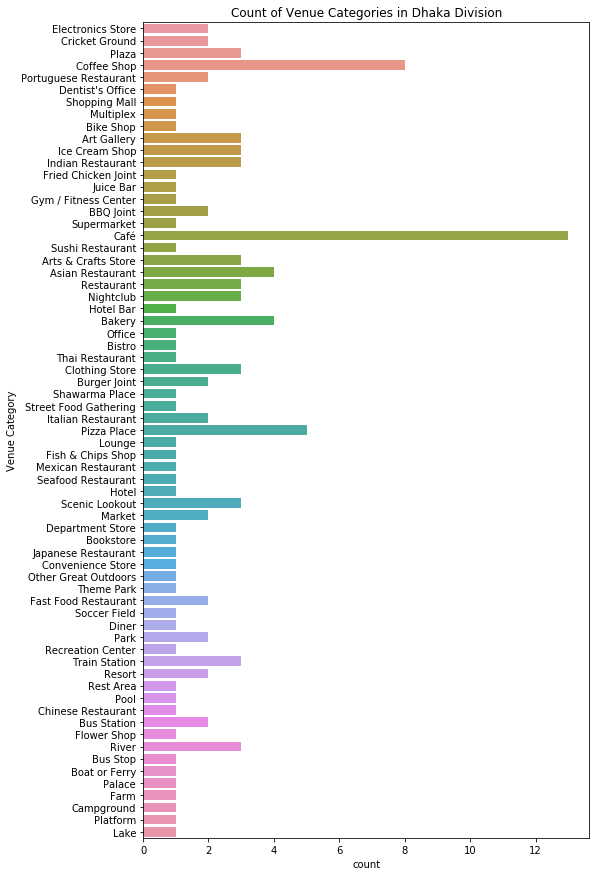

In [4]:
plt.figure(figsize=(8, 15))
p = sns.countplot(data=dhaka_venues, y = 'Venue Category')
plt.title('Count of Venue Categories in Dhaka Division')
plt.show()

<a id='item3'></a>

<a id='item3'></a>

### k-means Clustering of Dhaka Districts

#### One-Hot Encoding

In [5]:
# one hot encoding
dhaka_onehot = pd.get_dummies(dhaka_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dhaka_onehot['District'] = dhaka_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [dhaka_onehot.columns[-1]] + list(dhaka_onehot.columns[:-1])
dhaka_onehot = dhaka_onehot[fixed_columns]

dhaka_onehot.head()

District  Art Gallery  Arts & Crafts Store  Asian Restaurant  BBQ Joint  \
0    Dhaka            0                    0                 0          0   
1    Dhaka            0                    0                 0          0   
2    Dhaka            0                    0                 0          0   
3    Dhaka            0                    0                 0          0   
4    Dhaka            0                    0                 0          0   

   Bakery  Bike Shop  Bistro  Boat or Ferry  Bookstore  Burger Joint  \
0       0          0       0              0          0             0   
1       0          0       0              0          0             0   
2       0          0       0              0          0             0   
3       0          0       0              0          0             0   
4       0          0       0              0          0             0   

   Bus Station  Bus Stop  Café  Campground  Chinese Restaurant  \
0            0         0     0           0                   0   
1            0         0     0           0                   0   
2            0         0     0           0                   0   
3            0         0     0           0                   0   
4            0         0     0           0                   0   

   Clothing Store  Coffee Shop  Convenience Store  Cricket Ground  \
0               0            0                  0               0   
1               0            0                  0               1   
2               0            0                  0               0   
3               0            1                  0               0   
4               0            0                  0               0   

   Dentist's Office  Department Store  Diner  Electronics Store  Farm  \
0                 0                 0      0                  1     0   
1                 0                 0      0                  0     0   
2                 0                 0      0                  0     0   
3                 0                 0      0                  0     0   
4                 0                 0      0                  0     0   

   Fast Food Restaurant  Fish & Chips Shop  Flower Shop  Fried Chicken Joint  \
0                     0                  0            0                    0   
1                     0                  0            0                    0   
2                     0                  0            0                    0   
3                     0                  0            0                    0   
4                     0                  0            0                    0   

   Gym / Fitness Center  Hotel  Hotel Bar  Ice Cream Shop  Indian Restaurant  \
0                     0      0          0               0                  0   
1                     0      0          0               0                  0   
2                     0      0          0               0                  0   
3                     0      0          0               0                  0   
4                     0      0          0               0                  0   

   Italian Restaurant  Japanese Restaurant  Juice Bar  Lake  Lounge  Market  \
0                   0                    0          0     0       0       0   
1                   0                    0          0     0       0       0   
2                   0                    0          0     0       0       0   
3                   0                    0          0     0       0       0   
4                   0                    0          0     0       0       0   

   Mexican Restaurant  Multiplex  Nightclub  Office  Other Great Outdoors  \
0                   0          0          0       0                     0   
1                   0          0          0       0                     0   
2                   0          0          0       0                     0   
3                   0          0          0       0                     0   
4                   0          0 

And let's examine the new dataframe size.

In [6]:
dhaka_onehot.shape

(129, 68)

#### Group rows by district and by taking the mean of the frequency of occurrence of each category

In [7]:
dhaka_grouped = dhaka_onehot.groupby('District').mean().reset_index()
dhaka_grouped.head()

District  Art Gallery  Arts & Crafts Store  Asian Restaurant  BBQ Joint  \
0        Dhaka         0.03                 0.03              0.04       0.02   
1      Gazipur         0.00                 0.00              0.00       0.00   
2    Manikganj         0.00                 0.00              0.00       0.00   
3   Munshiganj         0.00                 0.00              0.00       0.00   
4  Narayanganj         0.00                 0.00              0.00       0.00   

   Bakery  Bike Shop  Bistro  Boat or Ferry  Bookstore  Burger Joint  \
0    0.04       0.01    0.01       0.000000       0.01          0.02   
1    0.00       0.00    0.00       0.000000       0.00          0.00   
2    0.00       0.00    0.00       0.000000       0.00          0.00   
3    0.00       0.00    0.00       0.000000       0.00          0.00   
4    0.00       0.00    0.00       0.166667       0.00          0.00   

   Bus Station  Bus Stop  Café  Campground  Chinese Restaurant  \
0     0.000000  0.000000  0.13         0.0            0.000000   
1     0.000000  0.000000  0.00         0.0            0.000000   
2     0.333333  0.000000  0.00         0.0            0.333333   
3     0.000000  0.000000  0.00         0.0            0.000000   
4     0.000000  0.166667  0.00         0.0            0.000000   

   Clothing Store  Coffee Shop  Convenience Store  Cricket Ground  \
0            0.03         0.08               0.01            0.01   
1            0.00         0.00               0.00            0.00   
2            0.00         0.00               0.00            0.00   
3            0.00         0.00               0.00            0.25   
4            0.00         0.00               0.00            0.00   

   Dentist's Office  Department Store  Diner  Electronics Store  Farm  \
0              0.01              0.01   0.01               0.01   0.0   
1              0.00              0.00   0.00               0.00   0.0   
2              0.00              0.00   0.00               0.00   0.0   
3              0.00              0.00   0.00               0.00   0.0   
4              0.00              0.00   0.00               0.00   0.0   

   Fast Food Restaurant  Fish & Chips Shop  Flower Shop  Fried Chicken Joint  \
0                  0.02               0.01     0.000000                 0.01   
1                  0.00               0.00     0.000000                 0.00   
2                  0.00               0.00     0.333333                 0.00   
3                  0.00               0.00     0.000000                 0.00   
4                  0.00               0.00     0.000000                 0.00   

   Gym / Fitness Center  Hotel  Hotel Bar  Ice Cream Shop  Indian Restaurant  \
0                  0.01   0.01       0.01            0.03               0.03   
1                  0.00   0.00       0.00            0.00               0.00   
2                  0.00   0.00       0.00            0.00               0.00   
3                  0.00   0.00       0.00            0.00               0.00   
4                  0.00   0.00       0.00            0.00               0.00   

   Italian Restaurant  Japanese Restaurant  Juice Bar  Lake  Lounge  Market  \
0                0.02                 0.01       0.01   0.0    0.01    0.01   
1                0.00                 0.00       0.00   0.0    0.00    0.00   
2                0.00                 0.00       0.00   0.0    0.00    0.00   
3                0.00                 0.00       0.00   0.0    0.00    0.25   
4                0.00                 0.00       0.00   0.0    0.00    0.00   

   Mexican Restaurant  Multiplex  Nightclub  Office  Other Great Outdoors  \
0                0.01       0.01       0.03    0.01                  0.01   
1                0.00       0.00       0.00    0.00                  0.00   
2                0.00       0.00       0.00    0.00                  0.00   
3                0.00       0.00       0.00    0.00                  0.00   
4            

#### Let's confirm the new size

In [8]:
dhaka_grouped.shape

(8, 68)

#### Let's find the top 5 venues in each district that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [9]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [10]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = dhaka_grouped['District']

for ind in np.arange(dhaka_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dhaka_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

District 1st Most Common Venue 2nd Most Common Venue  \
0        Dhaka                  Café           Coffee Shop   
1      Gazipur                Resort         Train Station   
2    Manikganj    Chinese Restaurant           Flower Shop   
3   Munshiganj                 River        Cricket Ground   
4  Narayanganj         Train Station         Boat or Ferry   
5    Narsingdi         Train Station        Scenic Lookout   
6      Rajbari              Platform     Electronics Store   
7      Tangail                 Plaza                  Lake   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0      Asian Restaurant                Bakery           Pizza Place  
1             Rest Area                  Pool     Recreation Center  
2           Bus Station         Train Station                  Farm  
3                Market         Train Station                  Farm  
4                Palace              Bus Stop                 River  
5            Campground           Bus Station                  Farm  
6         Train Station                  Farm        Cricket Ground  
7                  Farm     Convenience Store        Cricket Ground

### Cluster Districts

In [11]:
dhk = pd.read_csv('dhk.csv')
dhk.drop('Unnamed: 0', axis = 1, inplace = True)
dhk.head()

Division     District  Population   Latitude  Longitude
0    Dhaka        Dhaka    12518000  23.779815  90.361782
1    Dhaka     Faridpur     1989000  23.464922  89.861945
2    Dhaka      Gazipur     3548000  24.105045  90.464526
3    Dhaka    Gopalganj     1218000  23.103493  89.907841
4    Dhaka  Kishoreganj     3029000  24.340814  90.927683

Run *k*-means to cluster the districts into 4 clusters.

In [12]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

dhaka_grouped_clustering = dhaka_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dhaka_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 1, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [13]:
# add clustering labels
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dhaka_merged = dhk

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dhaka_merged = dhaka_merged.join(districts_venues_sorted.set_index('District'), on='District')

dhaka_merged.groupby('District')

# simply drop whole row with NaN in "Cluster Labels" column
dhaka_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)

dhaka_merged.head()

Division     District  Population   Latitude  Longitude  Cluster Labels  \
0    Dhaka        Dhaka    12518000  23.779815  90.361782             0.0   
2    Dhaka      Gazipur     3548000  24.105045  90.464526             0.0   
6    Dhaka    Manikganj     1447000  23.871163  89.998783             0.0   
7    Dhaka   Munshiganj     1503000  23.548380  90.534972             0.0   
8    Dhaka  Narayanganj     3074000  23.623811  90.499966             0.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Café           Coffee Shop      Asian Restaurant   
2                Resort         Train Station             Rest Area   
6    Chinese Restaurant           Flower Shop           Bus Station   
7                 River        Cricket Ground                Market   
8         Train Station         Boat or Ferry                Palace   

  4th Most Common Venue 5th Most Common Venue  
0                Bakery           Pizza Place  
2                  Pool     Recreation Center  
6         Train Station                  Farm  
7         Train Station                  Farm  
8              Bus Stop                 River

In [14]:
dhaka_merged["Cluster Labels"]= dhaka_merged["Cluster Labels"].astype(int)
dhaka_merged.dtypes

Division                  object
District                  object
Population                 int64
Latitude                 float64
Longitude                float64
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

<a id='item4'></a>

### Visualization of Clusters

In [15]:
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

address = 'Dhaka Bangladesh'

geolocator = Nominatim(user_agent="Bangladesh_explorer")
location = geolocator.geocode(address)
latitude_bd = location.latitude
longitude_bd = location.longitude
print('The geograpical coordinate of Bangladesh are {}, {}.'.format(latitude_bd, longitude_bd))

The geograpical coordinate of Bangladesh are 23.810651, 90.4126466.


In [16]:
import folium
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude_bd, longitude_bd], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dhaka_merged['Latitude'], dhaka_merged['Longitude'], dhaka_merged['District'], dhaka_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

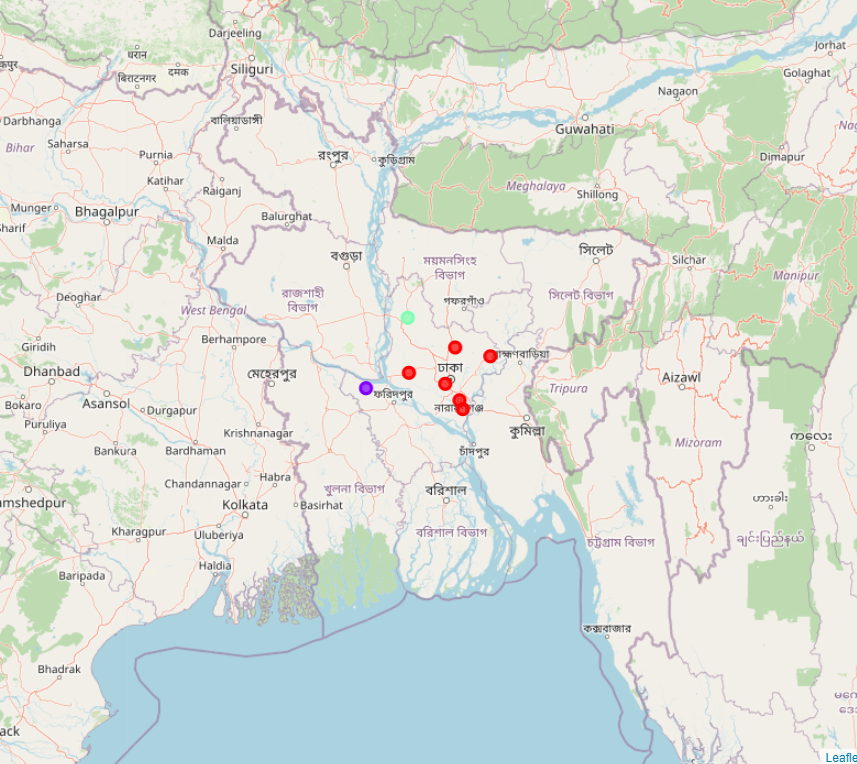

In [59]:
## here's the screenshot as Github doesn't render folium map 

from IPython.display import Image
Image("Image/cluster_dhaka.png")

<a id='item4'></a>

### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

### Let's name them first

In [18]:
labels = kmeans.labels_
dhaka_grouped["Labels"] = labels
cluster_grp = dhaka_grouped.groupby('Labels').mean()
cluster_grp.idxmax(axis=1)

Labels
0                River
1    Electronics Store
2                 Lake
dtype: object

### Cluster 0: River

In [19]:
dhaka_merged.loc[dhaka_merged['Cluster Labels'] == 0, dhaka_merged.columns[[1] + list(range(5, dhaka_merged.shape[1]))]]

District  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0        Dhaka               0                  Café           Coffee Shop   
2      Gazipur               0                Resort         Train Station   
6    Manikganj               0    Chinese Restaurant           Flower Shop   
7   Munshiganj               0                 River        Cricket Ground   
8  Narayanganj               0         Train Station         Boat or Ferry   
9    Narsingdi               0         Train Station        Scenic Lookout   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0      Asian Restaurant                Bakery           Pizza Place  
2             Rest Area                  Pool     Recreation Center  
6           Bus Station         Train Station                  Farm  
7                Market         Train Station                  Farm  
8                Palace              Bus Stop                 River  
9            Campground           Bus Station                  Farm

### Cluster 1:  Electronics Store

In [20]:
dhaka_merged.loc[dhaka_merged['Cluster Labels'] == 1, dhaka_merged.columns[[1] + list(range(5, dhaka_merged.shape[1]))]]

District  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
10  Rajbari               1              Platform     Electronics Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
10         Train Station                  Farm        Cricket Ground

### Cluster 2: Lake

In [21]:
dhaka_merged.loc[dhaka_merged['Cluster Labels'] == 2, dhaka_merged.columns[[1] + list(range(5, dhaka_merged.shape[1]))]]

District  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
12  Tangail               2                 Plaza                  Lake   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
12                  Farm     Convenience Store        Cricket Ground

### Let's focus on Cluster 0

In [22]:
clus_0 = dhaka_merged.loc[dhaka_merged['Cluster Labels'] == 0, dhaka_merged.columns[[1] + list(range(5, dhaka_merged.shape[1]))]]

In [23]:
## Let's keep the columns related to food business only and delete the others

cols  = ['District', 'Asian Restaurant',
       'BBQ Joint', 'Bakery', 'Bistro',
       'Burger Joint', 'Café',
       'Chinese Restaurant', 'Coffee Shop',
       'Diner',
       'Fast Food Restaurant', 'Fish & Chips Shop', 
       'Fried Chicken Joint',  'Hotel', 'Hotel Bar',
       'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Juice Bar',
       'Mexican Restaurant', 
       'Pizza Place',
       'Portuguese Restaurant',
       'Restaurant',
       'Seafood Restaurant', 'Shawarma Place',
       'Street Food Gathering', 'Sushi Restaurant',
       'Thai Restaurant']

dist_clus_0 = list(clus_0.District.unique())

dhk_ = dhaka_onehot.groupby('District').sum().reset_index()
dhaka_clust0 = dhk_[dhk_.District.isin(dist_clus_0)]
dhaka_clust0 = dhaka_clust0[cols]
dhaka_clust0['Sum'] = dhaka_clust0.sum(axis=1)
dhaka_clust0

District  Asian Restaurant  BBQ Joint  Bakery  Bistro  Burger Joint  \
0        Dhaka                 4          2       4       1             2   
1      Gazipur                 0          0       0       0             0   
2    Manikganj                 0          0       0       0             0   
3   Munshiganj                 0          0       0       0             0   
4  Narayanganj                 0          0       0       0             0   
5    Narsingdi                 0          0       0       0             0   

   Café  Chinese Restaurant  Coffee Shop  Diner  Fast Food Restaurant  \
0    13                   0            8      1                     2   
1     0                   0            0      0                     0   
2     0                   1            0      0                     0   
3     0                   0            0      0                     0   
4     0                   0            0      0                     0   
5     0                   0            0      0                     0   

   Fish & Chips Shop  Fried Chicken Joint  Hotel  Hotel Bar  \
0                  1                    1      1          1   
1                  0                    0      0          0   
2                  0                    0      0          0   
3                  0                    0      0          0   
4                  0                    0      0          0   
5                  0                    0      0          0   

   Indian Restaurant  Italian Restaurant  Japanese Restaurant  Juice Bar  \
0                  3                   2                    1          1   
1                  0                   0                    0          0   
2                  0                   0                    0          0   
3                  0                   0                    0          0   
4                  0                   0                    0          0   
5                  0                   0                    0          0   

   Mexican Restaurant  Pizza Place  Portuguese Restaurant  Restaurant  \
0                   1            4                      2           3   
1                   0            0                      0           0   
2                   0            0                      0           0   
3                   0            0                      0           0   
4                   0            1                      0           0   
5                   0            0                      0           0   

   Seafood Restaurant  Shawarma Place  Street Food Gathering  \
0                   1               1                      1   
1                   0               0                      0   
2                   0               0                      0   
3                   0               0                      0   
4                   0               0                      0   
5                   0               0                      0   

   Sushi Restaurant  Thai Restaurant  Sum  
0                 1                1   63  
1                 0                0    0  
2                 0                0    1  
3                 0                0    0  
4                 0                0    1  
5                 0                0    0

#### Let's visualize this table

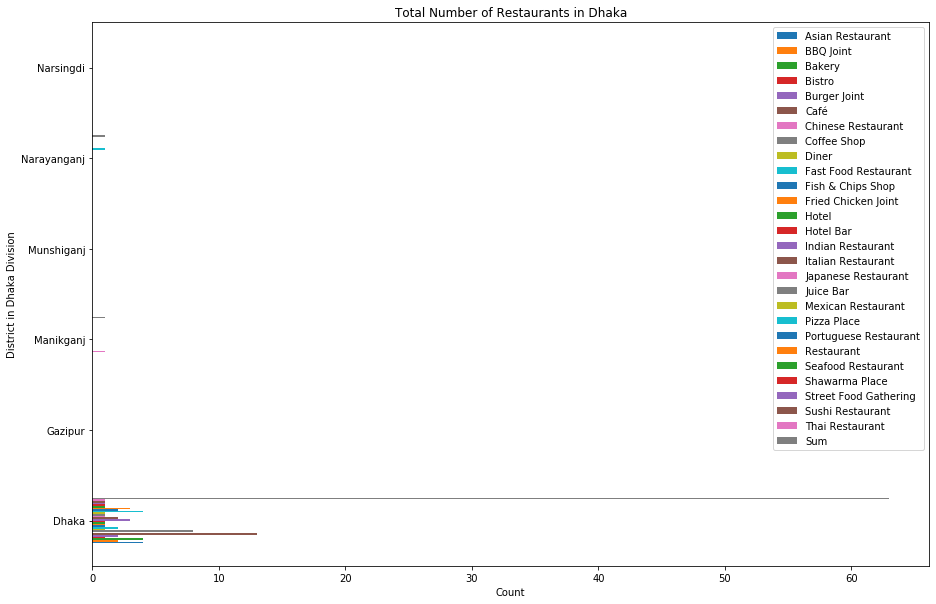

In [24]:
a = dhaka_clust0.set_index('District')
ax = dhaka_clust0.set_index('District').plot(kind='barh', figsize=(15, 10))

plt.xlabel('Count') # add to x-label to the plot
plt.ylabel('District in Dhaka Division')
plt.title('Total Number of Restaurants in Dhaka') # add title to the plot

ax.get_legend().set_visible(True)
plt.show()

#### Another high-level overview looks like below--

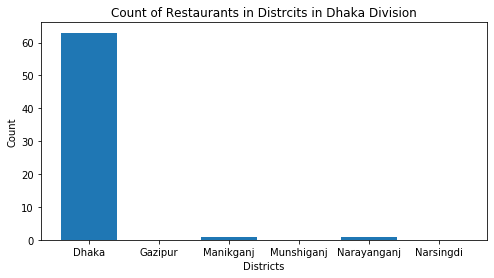

In [25]:
plt.figure(figsize=(8, 4)) 
plt.bar(dhaka_clust0['District'], dhaka_clust0['Sum'], width=0.8, bottom=None, align='center')
plt.xlabel('Districts') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Count of Restaurants in Distrcits in Dhaka Division') # add title to the plot
plt.show()

<a id='item6'></a>

### Analyze the District of Dhaka to Open a Restaurant

Looking at the clusters above, it's apparent that there are more varieties in venues in Dhaka. Also, the population data shows that a lot of people are attracted towards Dhaka. So, we want to look more closely on the data we've collected from different sources and figure out what kind of restaurant will be more profitable and where can set it up!  

#### Let's look at the frequency of the venues in different districts of Dhaka

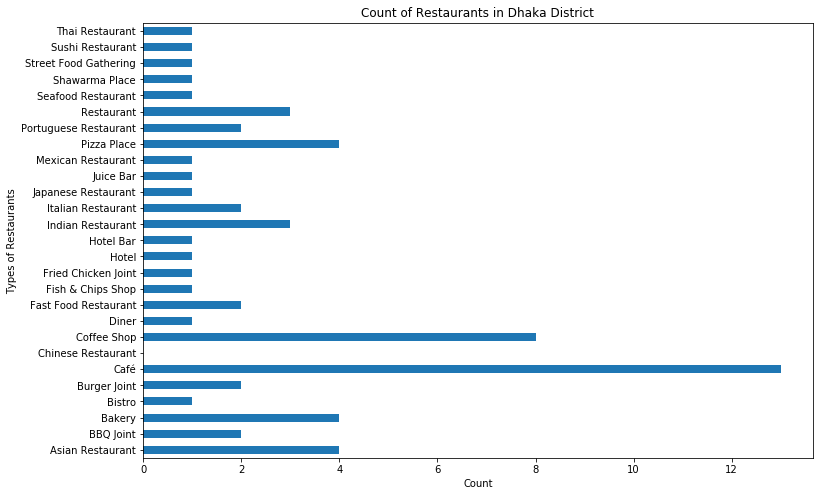

In [26]:
dhaka = dhaka_clust0[dhaka_clust0['District'] == 'Dhaka']
dhaka.drop('District', axis = 1, inplace = True)
dhaka.drop('Sum', axis = 1, inplace = True)

ax = dhaka.T.plot(kind = 'barh', figsize=(12, 8))
plt.xlabel('Count') # add to x-label to the plot
plt.ylabel('Types of Restaurants')
plt.title('Count of Restaurants in Dhaka District') # add title to the plot
ax.get_legend().set_visible(False)

#### Let's pull out the population data!

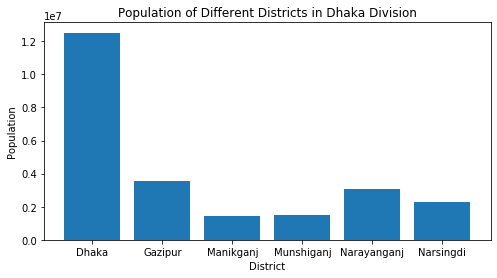

In [27]:
plt.figure(figsize=(8, 4)) 

df_population = dhk[dhk.District.isin(['Dhaka', 'Gazipur', 'Manikganj', 'Munshiganj', 'Narayanganj',
       'Narsingdi' ])]

plt.bar(df_population['District'], df_population['Population'], width=0.8, bottom=None, align='center')
plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population of Different Districts in Dhaka Division') # add title to the plot
plt.show()

From the charts above, the population of Dhaka is more than twice than that of Narayanganj and Tangail. At this stage, we want to add one more dataset in this study to get better insight of restaurant business in Dhaka city. Let's do this! 

In [28]:
dhaka_neigh = pd.read_csv('dhaka_neighborhood.csv')
dhaka_neigh.drop('Unnamed: 0', axis = 1, inplace = True)
dhaka_neigh.head()

Name of Metropolitan Thana  Area (sq km)  Population  Density (per sq km)  \
0                    Adabor           2.07     86540.0              41806.0   
1                Uttar Khan          20.09     52014.0               2590.0   
2                    Uttara          36.91     66636.0              11295.0   
3                 Kadamtali          10.16    330565.0              32536.0   
4                 Kalabagan           1.26    106671.0              84660.0   

   Literacy Rate (%)  
0              62.24  
1              64.58  
2              65.67  
3              63.87  
4              76.88

In [29]:
dhaka_neigh.dtypes

Name of Metropolitan Thana     object
Area (sq km)                  float64
Population                    float64
Density (per sq km)           float64
Literacy Rate (%)             float64
dtype: object

<a id='item7'></a>

### Analysis of Dataset 2 for more info on Socio-economic Factors

#### Population: Areas with more than average population in Dhaka

In [30]:
mean_pop_dhk = dhaka_neigh['Population'].mean() 
dhk_pop = dhaka_neigh[dhaka_neigh['Population'] >= (mean_pop_dhk)]
dhk_pop.head()

Name of Metropolitan Thana  Area (sq km)  Population  Density (per sq km)  \
3                  Kadamtali          10.16    330565.0              32536.0   
5                     Kafrul           7.89    272939.0              34593.0   
10                  Khilgaon          14.83    230902.0              15560.0   
12                  Gendaria           1.83    160541.0              87728.0   
13          Chawkbazar Model           2.07    160112.0              77349.0   

    Literacy Rate (%)  
3               63.87  
5               69.87  
10              56.92  
12              69.97  
13              75.49

In [31]:
df_dhk_po = dhk_pop[['Name of Metropolitan Thana', 'Population']]
df_dhk_po.set_index('Name of Metropolitan Thana', inplace = True)
df_dhk_pop = df_dhk_po.sort_values('Population', ascending = False)

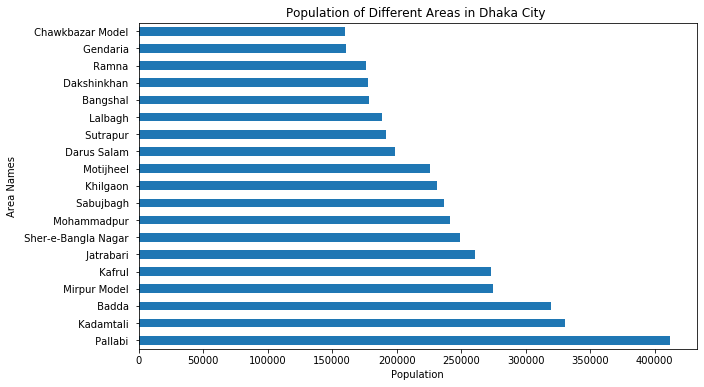

In [32]:
ax = df_dhk_pop.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Population') # add to x-label to the plot
plt.ylabel('Area Names') # add y-label to the plot
plt.title('Population of Different Areas in Dhaka City ') # add title to the plot

ax.get_legend().set_visible(False)
plt.show()

#### Population Density: Areas with more than average population density in Dhaka

In [33]:
mean_popdense_dhk = dhaka_neigh['Density (per sq km)'].mean() 
dhk_pop_dense = dhaka_neigh[dhaka_neigh['Density (per sq km)'] >= (mean_popdense_dhk)]
dhk_pop_dense.head()

Name of Metropolitan Thana  Area (sq km)  Population  Density (per sq km)  \
0                     Adabor           2.07     86540.0              41806.0   
4                  Kalabagan           1.26    106671.0              84660.0   
6              Kamrangirchar           3.63    143208.0              39452.0   
8                    Kotwali           0.67     82488.0             123117.0   
12                  Gendaria           1.83    160541.0              87728.0   

    Literacy Rate (%)  
0               62.24  
4               76.88  
6               42.84  
8               77.78  
12              69.97

In [34]:
df_dhk_pop_den = dhk_pop_dense[['Name of Metropolitan Thana', 'Density (per sq km)']]
df_dhk_pop_den.set_index('Name of Metropolitan Thana', inplace = True)
df_dhk_pop_dense = df_dhk_pop_den.sort_values('Density (per sq km)', ascending = False)

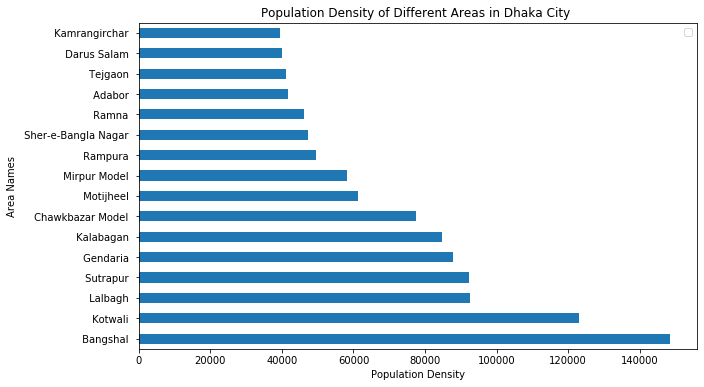

In [35]:
df_dhk_pop_dense.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Area Names') # add y-label to the plot
plt.title('Population Density of Different Areas in Dhaka City ') # add title to the plot

plt.legend('')
plt.show()

#### Relationship Between Literacy Rate and Population Distribution In Different Parts of Dhaka

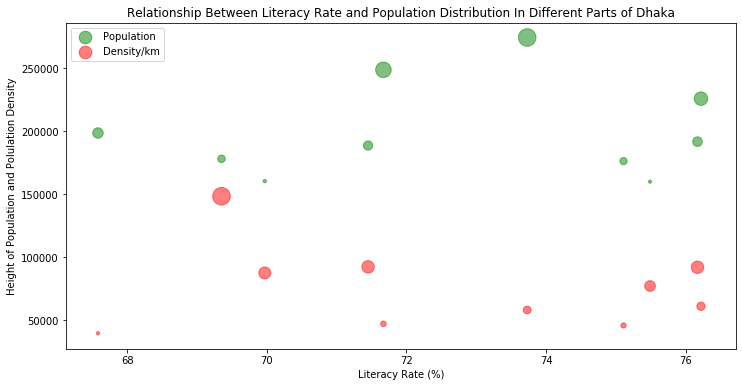

In [36]:
dhk_population = dhk_pop[dhk_pop['Density (per sq km)'] >= (mean_popdense_dhk)]
dhk_population.set_index('Name of Metropolitan Thana', drop = True)

dhk_population['Literacy Rate (%)'].astype(int)
dhk_population = dhk_population.sort_values('Literacy Rate (%)', ascending = False)

# normalize Population data
norm_Population = (dhk_population['Population'] - dhk_population['Population'].min()) / (dhk_population['Population'].max() - dhk_population['Population'].min())

# normalize Population Density data
norm_PopulationDensity = (dhk_population['Density (per sq km)'] - dhk_population['Density (per sq km)'].min()) / (dhk_population['Density (per sq km)'].max() - dhk_population['Density (per sq km)'].min())

# Population
ax0 = dhk_population.plot(kind='scatter',
                    x='Literacy Rate (%)',
                    y='Population',
                    figsize=(12, 6),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_Population * 300 + 10,  # pass in weights 
                   )

# Argentina
ax1 = dhk_population.plot(kind='scatter',
                    x='Literacy Rate (%)',
                    y='Density (per sq km)',
                    alpha=0.5,
                    color="red",
                    s=norm_PopulationDensity * 300 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Height of Population and Polulation Density')
ax0.set_title('Relationship Between Literacy Rate and Population Distribution In Different Parts of Dhaka')
ax0.legend(['Population', 'Density/km'], loc='upper left', fontsize='medium')

In [37]:
dhk_population.dtypes

Name of Metropolitan Thana     object
Area (sq km)                  float64
Population                    float64
Density (per sq km)           float64
Literacy Rate (%)             float64
dtype: object

Looks good so far!

#### Literacy Rate: Areas with top 20% Literacy in Dhaka

In [38]:
sortedliteracy = dhaka_neigh.sort_values('Literacy Rate (%)', ascending = False)
dhk_lit_rate = sortedliteracy[:8]
dhk_lit_area = dhk_lit_rate[['Name of Metropolitan Thana', 'Literacy Rate (%)']]
dhk_lit_area = dhk_lit_area.set_index('Name of Metropolitan Thana', drop = True)
dhk_lit_area

Literacy Rate (%)
Name of Metropolitan Thana                   
 New Market                             82.32
 Paltan                                 81.74
 Shahbagh                               79.39
 Bimanbandar                            79.13
 Kotwali                                77.78
 Kalabagan                              76.88
 Tejgaon                                76.51
 Motijheel                              76.22

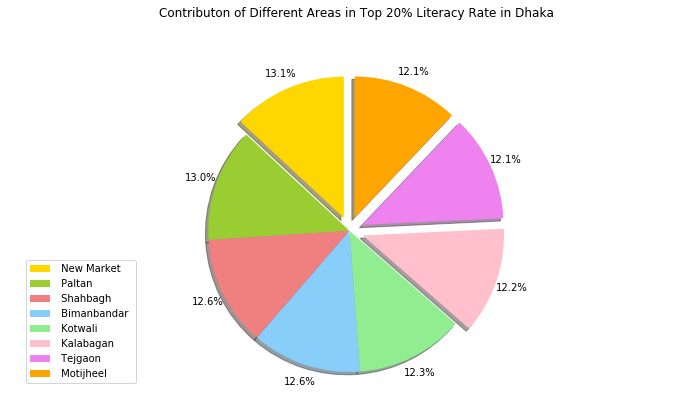

In [39]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'violet', 'orange']
explode_list = [0.1, 0, 0, 0, 0.0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

dhk_lit_area['Literacy Rate (%)'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Contributon of Different Areas in Top 20% Literacy Rate in Dhaka', y=1.12) 

plt.axis('equal') 
plt.ylabel(' ') # add y-label to the plot
# add legend
plt.legend(labels=dhk_lit_area.index, loc='lower left') 

plt.show()

### What's that one area with high population density and high literacy rate? Let's find out! 

#### Top 20% Educated Areas in Dhaka

In [40]:
dhk_lit_rate.reset_index(drop =True)

Name of Metropolitan Thana  Area (sq km)  Population  Density (per sq km)  \
0                New Market           1.67     66439.0              37173.0   
1                    Paltan           1.42     64492.0              34854.0   
2                  Shahbagh           3.49     74113.0              21236.0   
3               Bimanbandar           8.02      5079.0                634.0   
4                   Kotwali           0.67     82488.0             123117.0   
5                 Kalabagan           1.26    106671.0              84660.0   
6                   Tejgaon           2.74    118540.0              41073.0   
7                 Motijheel           3.69    225999.0              61246.0   

   Literacy Rate (%)  
0              82.32  
1              81.74  
2              79.39  
3              79.13  
4              77.78  
5              76.88  
6              76.51  
7              76.22

#### Top 20% Educated Areas that has more than average population density per kilometer

In [41]:
area_hi_pop = dhk_lit_rate[dhk_lit_rate['Density (per sq km)']>= (mean_popdense_dhk)]
area_hi_pop.reset_index(drop =True)

Name of Metropolitan Thana  Area (sq km)  Population  Density (per sq km)  \
0                   Kotwali           0.67     82488.0             123117.0   
1                 Kalabagan           1.26    106671.0              84660.0   
2                   Tejgaon           2.74    118540.0              41073.0   
3                 Motijheel           3.69    225999.0              61246.0   

   Literacy Rate (%)  
0              77.78  
1              76.88  
2              76.51  
3              76.22

#### Educated Area that has more than average population and more than average population density per kilometer

In [42]:
area_selected = area_hi_pop[area_hi_pop['Population'] >= (mean_pop_dhk)]
area_selected.reset_index(drop = True)

Name of Metropolitan Thana  Area (sq km)  Population  Density (per sq km)  \
0                 Motijheel           3.69    225999.0              61246.0   

   Literacy Rate (%)  
0              76.22

<a id='item8'></a>

## Motijheel it is! Aha!

#### What are the venues in Motijheel?

In [43]:
from geopy.geocoders import Nominatim

address = 'Motijheel'

geolocator = Nominatim(user_agent="Bangladesh_explorer")
location = geolocator.geocode(address)
latitude_Motijheel = location.latitude
longitude_Motijheel = location.longitude
print('The geograpical coordinate of Bangladesh are {}, {}.'.format(latitude_Motijheel, longitude_Motijheel))

The geograpical coordinate of Bangladesh are 23.7265973, 90.4216076.


#### Define Foursquare Credentials and Version

In [44]:
CLIENT_ID = '0OIOAMV3MQX4QYSSVYLHCR0MEFPKQTZQ4SS0MH2VZNGJMPWG' # your Foursquare ID
CLIENT_SECRET = 'AQVTXDL3BAYH3ZFXZ1GOYD5CSKIP24J5NRPRC31UUK4Z0TEO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0OIOAMV3MQX4QYSSVYLHCR0MEFPKQTZQ4SS0MH2VZNGJMPWG
CLIENT_SECRET:AQVTXDL3BAYH3ZFXZ1GOYD5CSKIP24J5NRPRC31UUK4Z0TEO


In [45]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Motijheel, 
    longitude_Motijheel, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0OIOAMV3MQX4QYSSVYLHCR0MEFPKQTZQ4SS0MH2VZNGJMPWG&client_secret=AQVTXDL3BAYH3ZFXZ1GOYD5CSKIP24J5NRPRC31UUK4Z0TEO&v=20180605&ll=23.7265973,90.4216076&radius=5000&limit=100'

In [46]:
# library to handle requests
import requests 

results = requests.get(url).json()

In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [48]:
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

venues = results['response']['groups'][0]['items']
    
motijheel_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
motijheel_venues =motijheel_venues.loc[:, filtered_columns]

# filter the category for each row
motijheel_venues['venue.categories'] = motijheel_venues.apply(get_category_type, axis=1)

# clean columns
motijheel_venues.columns = [col.split(".")[-1] for col in motijheel_venues.columns]

motijheel_venues.rename(columns={'name': 'Venue Name', 'categories': 'Venue_Category', 'lat': 'Latitude', 'lng': 'Longitude'}, inplace=True)
motijheel_venues.head()

Venue Name     Venue_Category   Latitude  Longitude
0       Star Kabab & Restaurant         Restaurant  23.721080  90.414140
1              Sung Food Garden  Indian Restaurant  23.734023  90.410031
2  Hirajheel Hotel & Restaurent         Restaurant  23.724898  90.421565
3                    Dhaka Club          Nightclub  23.738875  90.397341
4  Bangabandhu National Stadium       Soccer Field  23.727523  90.413565

In [49]:
print('There are {} uniques categories.'.format(len(motijheel_venues['Venue_Category'].unique())))

There are 27 uniques categories.


#### Who are the competitors?

In [50]:
df1 = motijheel_venues[motijheel_venues['Venue_Category'].isin(["Steakhouse", "Coffee Shop", "Café", "Bakery", "Diner" ])]

df2 = motijheel_venues[motijheel_venues['Venue_Category'].str.contains("Restaurant")]
df3 = motijheel_venues[motijheel_venues['Venue_Category'].str.contains("Joint")]
df4 = motijheel_venues[motijheel_venues['Venue_Category'].str.contains("Place")]

motijheel_restaurants = pd.concat([df1, df2, df3, df4])
motijheel_restaurants.reset_index(drop = True)

Venue Name     Venue_Category   Latitude  Longitude
0                  Hajir Biriani              Diner  23.721663  90.405687
1        Star Kabab & Reataurant             Bakery  23.737621  90.386968
2              Apon Coffee House        Coffee Shop  23.752260  90.421118
3                Barista Lavazza               Café  23.750008  90.393794
4           Sausly's Pantho Path             Bakery  23.752757  90.382310
5                     Cafe SoI 3               Café  23.739940  90.378937
6        Star Kabab & Restaurant         Restaurant  23.721080  90.414140
7               Sung Food Garden  Indian Restaurant  23.734023  90.410031
8   Hirajheel Hotel & Restaurent         Restaurant  23.724898  90.421565
9                Hotel Al Razzak  Indian Restaurant  23.718340  90.408796
10          CapriCorn's Skywatch   Asian Restaurant  23.750684  90.390869
11           Star Kabab & Bakery         Restaurant  23.753076  90.392092
12      Nirob Hotel & Restaurant   Asian Restaurant  23.721036  90.398868
13           Baburchi Restaurant         Restaurant  23.740544  90.375109
14             Capricorn's World         Restaurant  23.750419  90.390829
15       Shawarma Kebasish House          BBQ Joint  23.740024  90.391326
16                Shawarma House     Shawarma Place  23.740687  90.382719
17                    Pizza King        Pizza Place  23.719945  90.388840

In [51]:
motijheel = motijheel_restaurants['Venue_Category'].value_counts().to_frame()
motijheel.rename(columns={'Venue_Category': 'Value Counts'}, inplace=True)

#motijheel.reset_index(inplace = True)
motijheel

Value Counts
Restaurant                    5
Indian Restaurant             2
Café                          2
Bakery                        2
Asian Restaurant              2
Pizza Place                   1
Coffee Shop                   1
Shawarma Place                1
Diner                         1
BBQ Joint                     1

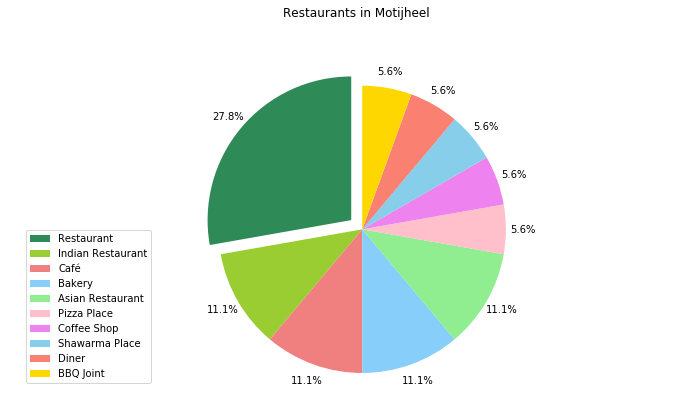

In [52]:
colors_list = ['seagreen', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'violet', 'skyblue', 'salmon', 'gold']
explode_list = [0.1, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0] # ratio for each continent with which to offset each wedge.

motijheel['Value Counts'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            #shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Restaurants in Motijheel', y=1.12) 

plt.axis('equal') 
plt.ylabel(' ') # add y-label to the plot
# add legend
plt.legend(labels=motijheel.index, loc='lower left') 

plt.show()

#### There's only one Diner in the vicinity!

In [53]:
Diner_data = motijheel_venues[motijheel_venues['Venue_Category'].isin(["Diner"])]
Diner_lat = Diner_data.Latitude
Diner_lng = Diner_data.Longitude

In [54]:
address = 'Dhaka'

geolocator = Nominatim(user_agent="Bangladesh_explorer")
location = geolocator.geocode(address)
latitude_dhk = location.latitude
longitude_dhk = location.longitude
print('The geograpical coordinate of Bangladesh are {}, {}.'.format(latitude_dhk, longitude_dhk))

The geograpical coordinate of Bangladesh are 23.810651, 90.4126466.


#### Let's see where all the restaurants are situated in Motijheel!

In [55]:
mot_map = folium.Map(location=[latitude_Motijheel, longitude_Motijheel], zoom_start=13,  tiles='Stamen Terrain')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(motijheel_restaurants.Latitude, motijheel_restaurants.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(motijheel_restaurants.Latitude)
longitudes = list(motijheel_restaurants.Longitude)
labels = list(motijheel_restaurants.Venue_Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(mot_map)    
    
# add incidents to map
mot_map.add_child(incidents)

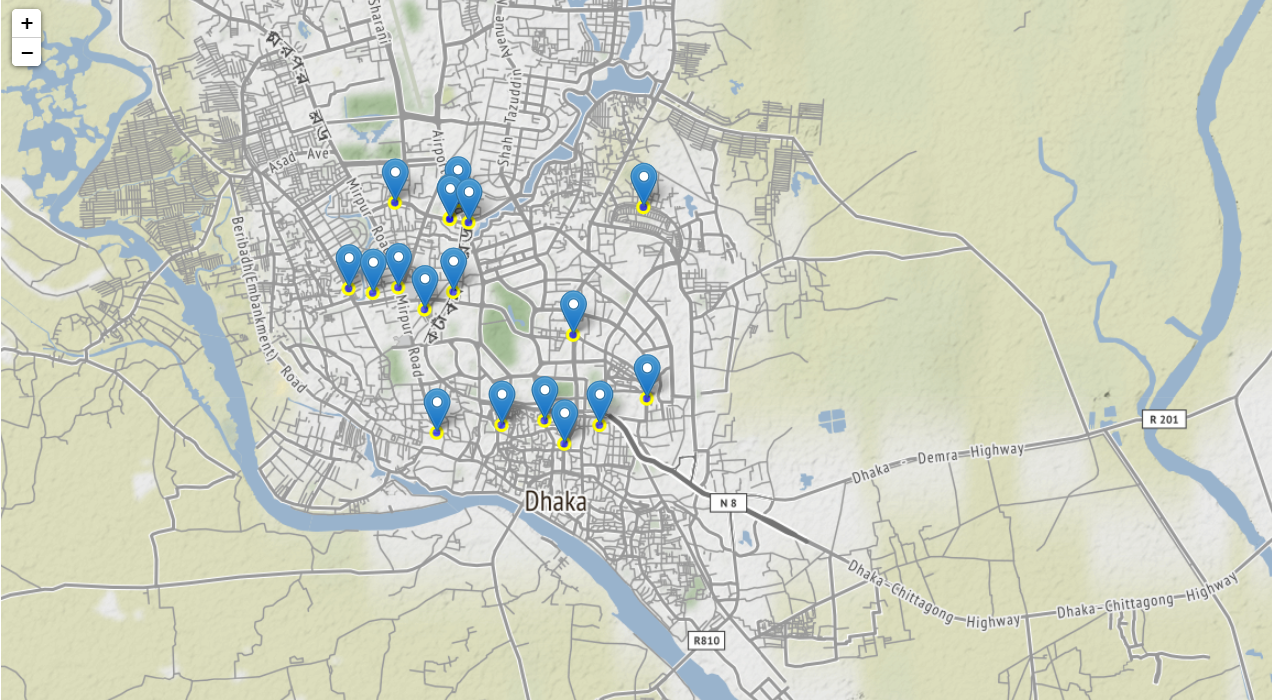

In [60]:
## here's the screenshot as Github doesn't render folium map 

from IPython.display import Image
Image("Image/res_motijheel.png")

#### Now let's look at the location of the only Diner in Motijheel!

In [57]:
mot_map = folium.Map(location=[latitude_Motijheel, longitude_Motijheel], zoom_start=14,  tiles='Stamen Terrain')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Diner_data.Latitude, Diner_data.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(Diner_data.Latitude)
longitudes = list(Diner_data.Longitude)
labels = list(Diner_data.Venue_Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(mot_map)    
    
# add incidents to map
mot_map.add_child(incidents)

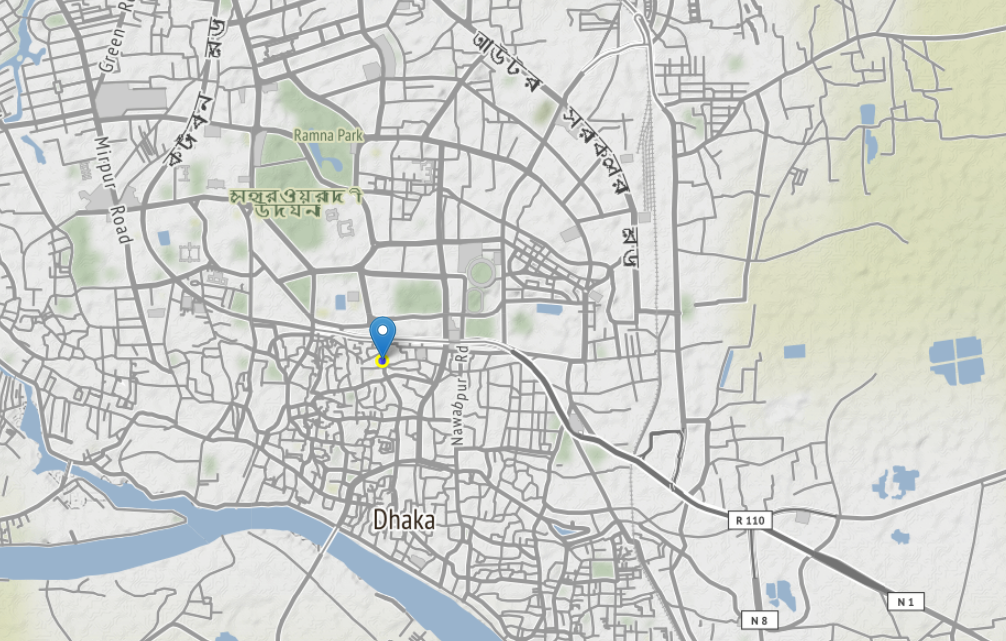

In [61]:
## here's the screenshot as Github doesn't render folium map 

from IPython.display import Image
Image("Image/diner_motijheel.png")

<a id='item9'></a>

## 8. Conclusion

There are not too many Shawarma Place, BBQ Joint, Diner and Pizza Place in Motijheel, Dhaka. One will face less competition in the business if any kind of the mentioned restaurats is opened in Motijheel area. People loves Biriyani and other spicy heavy meals during lunch and diner. So, we can suggest the investors to open a diner in Motijheel, Dhaka.

Also, the above map shows the location of the only Diner near Motijheel which is quite far from Ramna Park or Sohrawardi Udyan. So, our suggestion would be to set up a diner/ biriyani spot near "Ramna Park" in Motijheel, Dhaka. 

Here ends our analysis. Hope this helps!